In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
with open('/home/jupyter/results.json', 'r') as fp:
    results = json.load(fp)
    male_tpr = np.array(results['male_tpr'])
    male_fpr = np.array(results['male_fpr'])
    female_tpr = np.array(results['female_tpr'])
    female_fpr = np.array(results['female_fpr'])
    male_thresholds = np.array(results['male_thresholds'])
    female_thresholds = np.array(results['female_thresholds'])

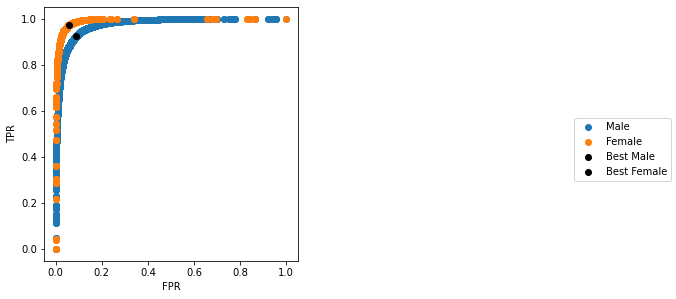

In [3]:
best_male = np.argmax(male_tpr - male_fpr)
best_female = np.argmax(female_tpr - female_fpr)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.scatter(male_fpr, male_tpr, label='Male')
ax.scatter(female_fpr, female_tpr, label='Female')
ax.scatter(male_fpr[best_male], male_tpr[best_male], marker='o', color='black', label='Best Male')
ax.scatter(female_fpr[best_female], female_tpr[best_female], marker='o', color='black', label='Best Female')
ax.set_aspect(1)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
fig.legend(loc='center right')
plt.show()

In [4]:
female_thresholds[best_female]

-0.9944378137588501

In [5]:
male_thresholds[best_male]

-0.9919214844703674

In [6]:
corres_f_idx = female_thresholds.size - np.searchsorted(female_thresholds[::-1], male_thresholds[best_male], side="right")

In [7]:
female_fpr[best_female], female_tpr[best_female]

(0.056059506531204645, 0.9727866473149492)

In [8]:
female_fpr[corres_f_idx], female_tpr[corres_f_idx]

(0.05497097242380261, 0.9709724238026125)

In [9]:
corres_m_idx = male_thresholds.size - np.searchsorted(male_thresholds[::-1], female_thresholds[best_female], side="right")

In [10]:
male_fpr[best_male], male_tpr[best_male]

(0.0899760263709919, 0.9266556787533713)

In [11]:
male_fpr[corres_m_idx], male_tpr[corres_m_idx]

(0.09342223554090501, 0.9293527120167815)

In [12]:
metrics.auc(male_fpr, male_tpr)

0.9746106429316723

In [13]:
metrics.auc(female_fpr, female_tpr)

0.992922849684341